In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def frequence(file_name):
	text_file = None
	#Si le fichier existe on l'ouvre et on continue sinon c'est fini
	try:
		text_file = open(file_name, 'r')
	except IOError:
		print ('Entrez un nom de fichier valide')
	
	alphabet = {}
	cpt = 0

	for line in text_file:
		for ch in line:
			#if ch != ' ' and ch != '\n':
			cpt+=1
			if not (ch in alphabet):
				alphabet.update({ch: 1})
			else :
				alphabet[ch] += 1

	for key, value in alphabet.items():
		alphabet[key] = float(value)/cpt
		#write in file all item of dictionary

	text_file.close();

	return alphabet

In [3]:
frequence("textes/germinal_very_small_nettoye")

{'D': 0.053475935828877004,
 'A': 0.0962566844919786,
 'N': 0.06951871657754011,
 'S': 0.10160427807486631,
 'L': 0.0427807486631016,
 'P': 0.026737967914438502,
 'I': 0.058823529411764705,
 'E': 0.15508021390374332,
 'R': 0.06417112299465241,
 'O': 0.058823529411764705,
 'U': 0.06951871657754011,
 'T': 0.08021390374331551,
 'B': 0.0106951871657754,
 'C': 0.026737967914438502,
 'H': 0.016042780748663103,
 'M': 0.03208556149732621,
 'V': 0.0213903743315508,
 'G': 0.0053475935828877,
 'X': 0.0053475935828877,
 'K': 0.0053475935828877}

In [4]:
def traitement(read_path, write_path):
	#open file where we write all item of the dictionary who will creat by our fonction
	result = open(write_path,"w")
	f = frequence(read_path)
	for key, value in f.items():
		#print key, value*100
		result.write(key)
		result.write(" %f\n" %(value))
	result.close()
	return f

In [5]:
def draw_hist(dict):
	x = []
	y = []

	for key, value in dict.items():
		x.append(key)
		y.append(value*100)

	plt.hist(x, weights = y)
	plt.show()

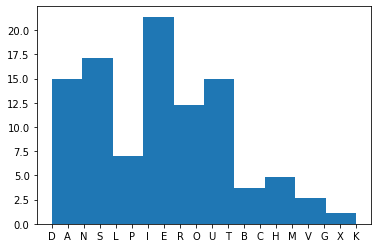

In [6]:
dict = traitement("textes/germinal_very_small_nettoye", "textes/germinal")
#histogramme avec numpy
draw_hist(dict)

In [7]:
def chiff_cesar_nb(nb,cle):
    return (nb+cle)%26

def dechiff_cesar_nb(nb,cle):
    return (nb-cle)%26

def chiff_cesar(text,cle):
    text_chiffre=""
    for i in text:
       # i devient n de 0 à 25
       #Maj / min
        if ord(i) < 97:
            dn = 65
        else:
            dn = 97
        n = ord(i) - dn
        n_chiffre=chiff_cesar_nb(n,cle) # n_chiffre reçois la valeur numerique du chiffrement de la valeur numerique de i
        i_chiffre=chr(n_chiffre+dn) # retour au lettres
        text_chiffre+=i_chiffre # concaténation de la chaine chiffré avec le caractere chiffré

    return text_chiffre

def cesar_attaque(text,cle):
    return chiff_cesar(text,-cle)  # appel à cesar_chiffre avec -cle

In [8]:
print("Chiffrement de Cesar\n")
text = "SALUTZ"
print("Texte à chiffrer :", text)
cle = 1
print("Clé :", cle)
text_chiffre = chiff_cesar(text, cle)
print("Texte chiffré :",text_chiffre)

Chiffrement de Cesar

Texte à chiffrer : SALUTZ
Clé : 1
Texte chiffré : TBMVUA


In [9]:
print("Déchiffrement de Cesar\n")
text_chiffre = "SALUT"
print("Texte à dechiffrer :", text_chiffre)
cle = 1    
print("Clé :", cle)
text_dechiffre = cesar_attaque(text_chiffre, cle)
print("Texte déchiffrée :",text_dechiffre)

Déchiffrement de Cesar

Texte à dechiffrer : SALUT
Clé : 1
Texte déchiffrée : RZKTS


In [10]:
def chiff_monoalphabetique(text,cle):
    #la cle de codage est un alphabet de la meme taille que l,alphabet d'entree dans notre cas
    #la cle de chifferement est un ensemble de lettre
    text_chiffre=''

    for i in text:
        #Maj / min
        if ord(i) < 97:
            i_chif=ord(i)-65
        else:
            i_chif = ord(i) - 97
        text_chiffre+=str(cle[i_chif])

    return text_chiffre

In [11]:
def dechiff_monoalphabetique(text_chiffre,cle):
    #cle de dechifferement est un ensemble de de lettres (26 dans notre cas)
    #c'est la meme cle utilisee pour chiffrer
    text=''

    for i_chif in text_chiffre:
        #si cest une majuscule ou une miniscule
        if ord(i_chif) < 97:
            dn = 65
        else:
            dn = 97

        for elem in range(26):
            if i_chif == cle[elem]:
                text += str(chr(elem + dn))

    return text

In [12]:
print("Chiffrement mono-alphabétique\n")
text_a_chiffre = "CECIESTUNTEST"
print ("Texte à chiffrer :", text_a_chiffre)
cle = "XCRINLSAOZWUYTQVHFDJMKGEPB"
print ("Clé :", cle)
text_chiffre = chiff_monoalphabetique(text_a_chiffre, cle)
print ("Texte chiffré :",text_chiffre)

Chiffrement mono-alphabétique

Texte à chiffrer : CECIESTUNTEST
Clé : XCRINLSAOZWUYTQVHFDJMKGEPB
Texte chiffré : RNRONDJMTJNDJ


In [13]:
print ("Déchiffrement mono-alphabétique\n")
text_chiffre ="CFXKQRXYXFRAN"
print ("Texte à dechiffrer :", text_chiffre)
cle = "XCRINLSAOZWUYTQVHFDJMKGEPB"
print ("Clé :", cle)
text_dechiffre = dechiff_monoalphabetique(text_chiffre, cle)
print ("Texte dechiffrée :",text_dechiffre)

Déchiffrement mono-alphabétique

Texte à dechiffrer : CFXKQRXYXFRAN
Clé : XCRINLSAOZWUYTQVHFDJMKGEPB
Texte dechiffrée : BRAVOCAMARCHE
